## Activation functions
Below we see some widely used activation functions. First, we look into the Sigmoid function.

/Users/yg211/PycharmProjects/ScratchPad/venv_nlp/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  """


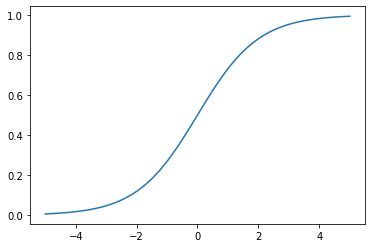

In [1]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

x = torch.range(-5., 5., 0.1)
y = torch.sigmoid(x)
plt.plot(x.numpy(), y.numpy())

The sigmoid function *saturates* (i.e., produces extreme valued outputs) very quickly and for a majority of the inputs. This can become a problem because it can lead to the gradients becoming either zero or diverging to an overflowing floating-point value. These phenomena are also known as *vanishing gradient* problem and *exploding gradient* problem, respectively. As a consequence, it is rare to see sigmoid units used in neural networks other than at the output, where the squashing property allows one to interpret outputs as probabilities. 

Another widely used function is the Tanh function. It is very similar to the sigmoid function, except that it is centered around 0, unlike sigmoid, which centers around 0.5.

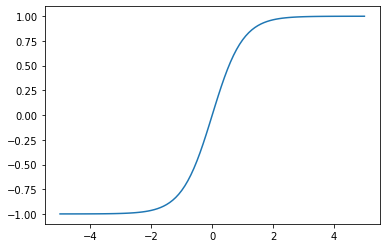

In [3]:
y = torch.tanh(x)
plt.plot(x.numpy(), y.numpy())

ReLU (pronounced ray-luh) stands for rectified linear unit. This is arguably the most important of the activation functions. In fact, one could venture as far as to say that many of the recent innovations in deep learning would’ve been possible without the use of ReLU. For something so fundamental, it’s also surprisingly new as far as neural network activation functions go. And it’s surprisingly simple in form:

$f(x) = max(0,x)$

So, all a ReLU unit is doing is clipping the negative values to zero

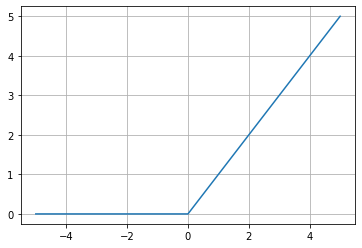

In [4]:
relu = torch.nn.ReLU()
y = relu(x)
plt.plot(x.numpy(), y.numpy())
plt.grid()

The clipping effect of ReLU that helps with the vanishing gradient problem can also become an issue, where over time certain outputs in the network can simply become zero and never revive again. This is called the “dying ReLU” problem. To mitigate that effect, variants such as the Leaky ReLU and Parametric ReLU (PReLU) activation functions have proposed, where the leak coefficient a is a learned parameter:

$f(x) = max(x,ax)$

/Users/yg211/PycharmProjects/ScratchPad/venv_nlp/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  


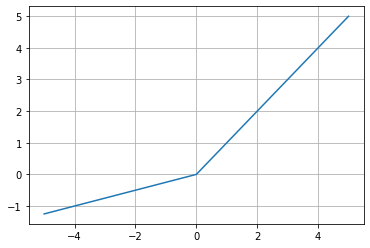

In [5]:
prelu = torch.nn.PReLU(num_parameters=1)
x = torch.range(-5., 5., 0.1)
y = prelu(x)
plt.plot(x.numpy(), y.detach().numpy())
plt.grid()

/Users/yg211/PycharmProjects/ScratchPad/venv_nlp/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  after removing the cwd from sys.path.


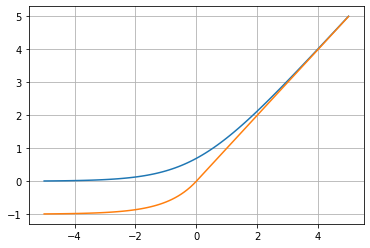

In [6]:
# softplus vs ELU
softplus = torch.nn.Softplus()
elu = torch.nn.ELU()
x = torch.range(-5., 5., 0.1)
sp = softplus(x)
elu_value = elu(x)
plt.plot(x.numpy(), sp, x.numpy(), elu_value)
plt.grid()

Another choice for the activation function is the softmax. Like the sigmoid function, the softmax function squashes the output of each unit to be between 0 and 1, as shown in Example 3-6. However, the softmax operation also divides each output by the sum of all the outputs, which gives us a discrete probability distribution3 over k possible classes:

$softmax(x_i) = \frac{\exp(x_i)}{\sum_j\exp(x_j)}$

The probabilities in the resulting distribution all sum up to one. This is very useful for interpreting outputs for classification tasks, as we'll see later in our course.

In [8]:
from torch import nn
softmax = nn.Softmax(dim=1)
x_input = torch.randn(1, 3) #create a 1*3 vector, with each element a random float number. 
y_output = softmax(x_input)
print(x_input)
print(y_output)
print(torch.sum(y_output, dim=1))

tensor([[ 0.8408, -0.5157, -1.6320]])
tensor([[0.7452, 0.1919, 0.0629]])
tensor([1.0000])


## Loss functions
In supervised learning, we want the output of the model to be as *similar* to the target output as possible. To measure the similarity/difference between the model output and the target output, we need to define *loss functions*. The higher the value of the loss function, it means the less similar the model outputs are to the target outputs, hence poorer the performance of the model. Below we look into two most widely used loss functions, used in classification and regression problems.

Reference: https://medium.com/udacity-pytorch-challengers/a-brief-overview-of-loss-functions-in-pytorch-c0ddb78068f7 

### Mean squared error (MSE) loss for regression problems
For regression problems for which the network’s output vector ($\mathbf{y'}$) and the target ($\mathbf{y}$) are continuous values, one common loss function is the mean squared error (MSE):

$L_{MSE}(\mathbf{y'},\mathbf{y}) = \sum_i (y'_i-y)^2$

The MSE is simply the average of the squares of the difference between the predicted and target values. There are several other loss functions that you can use for regression problems, such as mean absolute error (MAE) and root mean squared error (RMSE), but they all involve computing a real-valued distance between the output and target, and hence perform quite similarly.

In [9]:
mse_loss = nn.MSELoss()
mae_loss = nn.L1Loss()
outputs = torch.randn(1, 5, requires_grad=True)
targets = torch.randn(1, 5)

print(outputs)
print(targets)
print('mse loss', mse_loss(outputs, targets))
print('rmse loss', torch.sqrt(mse_loss(outputs, targets)))
print('mae loss', mae_loss(outputs, targets))

tensor([[-0.5946, -1.9814,  0.8117, -1.9830, -1.9040]], requires_grad=True)
tensor([[ 0.4773, -0.2450, -0.3743,  0.6358, -0.4887]])
mse loss tensor(2.8864, grad_fn=<MseLossBackward>)
rmse loss tensor(1.6989, grad_fn=<SqrtBackward>)
mae loss tensor(1.6057, grad_fn=<L1LossBackward>)


### Cross-entropy loss for classification problems
The categorical cross-entropy loss is typically used in a multiclass classification setting in which the outputs are interpreted as predictions of class membership probabilities. To explain how it works, consider a classification problem with three categories (e.g. in the sentiment analysis problem, each sentence can be positive, negative or neutral). For an input $x_i$, the model output should be a probability distribution over all categories, for example $y_i=(0.3,0.6,0.1)$. The true label should be the index for the true label (hence 0 or 1 or 2 in our example). 

In [10]:
ce_loss = nn.CrossEntropyLoss()
logits = torch.randn(5, 3, requires_grad=True) #suppose the model yields five outputs, and there are three categories
targets = torch.tensor([1, 0, 2, 1, 0], dtype=torch.int64)
loss = ce_loss(logits, targets) # input to this function should be logits, not probs, because it computes softmax inside!
print('outputs', logits)
print('targets', targets)
print('loss', loss)

outputs tensor([[0.2420, 0.1633, 0.5948],
        [0.1304, 0.6156, 0.2540],
        [0.1290, 0.0882, 0.7827],
        [0.6523, 0.1578, 0.1899],
        [0.4587, 0.4462, 0.0951]], grad_fn=<SoftmaxBackward>)
targets tensor([1, 0, 2, 1, 0])
loss tensor(1.1202, grad_fn=<NllLossBackward>)


## Toy Classification and Regression Examples 
Below, we will use the perceptron defined below to do classification and regression on some toy data.
### Regression

In [18]:
class Perceptron(nn.Module):
    """ A perceptron is one linear layer """
    def __init__(self, input_dim, out_dim):
        """
        Args:
            input_dim (int): size of the input features
        """
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(input_dim, out_dim)
       
    def forward(self, x_in, act_fnc):
        """The forward pass of the perceptron
        
        Args:
            x_in (torch.Tensor): an input data tensor 
                x_in.shape should be (batch, num_features)
        Returns:
            the resulting tensor. tensor.shape should be (batch,).
        """
        return act_fnc(self.fc1(x_in)).squeeze()

In [16]:
input_num = 100 # number of input cases; feel free to play with other numbers
input_dim = 30 # dimension of the input vector; feel free to play with other numbers
out_dim = 1 # because this is a regression problem
input_data = torch.randn(input_num, input_dim)
targets = torch.randn(input_num, out_dim)

# build model and make prediction values
relu = torch.nn.ReLU() # we use ReLU as activation function; you can also try others
model = Perceptron(input_dim,out_dim) # since this is a regression problem, the output dim is 1 (default)
outputs = model(input_data, relu) # invoke the forward function in Perceptron

# compute loss
mse_loss = nn.MSELoss() # for loss function, we use MSE loss
loss = mse_loss(outputs, targets)

print('model outputs:', outputs)
print('targets:',targets)
print(loss)

model outputs: tensor([0.0964, 0.4286, 0.0000, 0.6487, 0.5164, 0.0000, 0.0000, 0.5050, 0.3934,
        0.0000, 0.2497, 0.0000, 0.0091, 0.3561, 0.3093, 0.0000, 0.3332, 0.4445,
        0.0000, 0.0000, 0.0000, 0.0000, 0.1827, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.3067, 0.4055, 0.3648, 0.0000, 0.1143, 0.8044, 0.2396,
        0.6875, 1.3571, 0.3535, 0.0000, 0.0000, 0.0000, 0.1031, 0.0000, 0.2222,
        0.0000, 0.0000, 0.0203, 0.0000, 0.2281, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0331, 0.8862, 0.7422, 0.0000, 0.7938, 0.5731, 0.7532, 0.0000, 0.0000,
        0.5542, 0.9522, 0.0000, 0.0000, 0.2267, 0.0000, 0.0489, 0.0000, 0.0000,
        0.9976, 0.0000, 0.0660, 0.4771, 0.3281, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.3850, 0.8686, 0.3179, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.6617, 0.2463, 0.4702, 0.0000, 0.0000, 0.0598, 0.0000,
        0.0000], grad_fn=<SqueezeBackward0>)
targets: tensor([[-0.3641],
        [ 0.1256],
        [-0.2

/Users/yg211/PycharmProjects/ScratchPad/venv_nlp/lib/python3.6/site-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([100, 1])) that is different to the input size (torch.Size([100])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


### Classification

In [17]:
import random
input_num = 100 # number of input cases; feel free to play with other numbers
input_dim = 30 # dimension of the input vector; feel free to play with other numbers
out_dim = 5 # number of categories
input_data = torch.randn(input_num, input_dim)
tt = [random.randint(0,out_dim-1) for i in range(input_num)]
targets = torch.tensor(tt, dtype=torch.int64)

# build model and make prediction values
relu = torch.nn.ReLU() # we use ReLU as activation function; you can also try others
model = Perceptron(input_dim,out_dim) # since this is a regression problem, the output dim is 1 (default)
raw_outputs = model(input_data, relu) # invoke the forward function in Perceptron
softmax = nn.Softmax(dim=1)
outputs = softmax(raw_outputs)

# compute loss
ce_loss = nn.CrossEntropyLoss()
loss = ce_loss(outputs, targets)

print('model outputs:', outputs)
print('targets:',targets)
print(loss)

model outputs: tensor([[0.1518, 0.1370, 0.3684, 0.1370, 0.2057],
        [0.1801, 0.2645, 0.1801, 0.1801, 0.1952],
        [0.1818, 0.1818, 0.1818, 0.2033, 0.2512],
        [0.4535, 0.1366, 0.1366, 0.1366, 0.1366],
        [0.1715, 0.1715, 0.2676, 0.2178, 0.1715],
        [0.2782, 0.1426, 0.2938, 0.1426, 0.1426],
        [0.1778, 0.1778, 0.2888, 0.1778, 0.1778],
        [0.1715, 0.1320, 0.1320, 0.1475, 0.4170],
        [0.1886, 0.1886, 0.1886, 0.2415, 0.1928],
        [0.1788, 0.1788, 0.1788, 0.1788, 0.2846],
        [0.1250, 0.1250, 0.1250, 0.3358, 0.2892],
        [0.1924, 0.1931, 0.1545, 0.3054, 0.1545],
        [0.4128, 0.1767, 0.1368, 0.1368, 0.1368],
        [0.1698, 0.3163, 0.1698, 0.1743, 0.1698],
        [0.1635, 0.1029, 0.2436, 0.1029, 0.3870],
        [0.1471, 0.2766, 0.2821, 0.1471, 0.1471],
        [0.1141, 0.1599, 0.1141, 0.1831, 0.4289],
        [0.1269, 0.1133, 0.5331, 0.1133, 0.1133],
        [0.1653, 0.1876, 0.3164, 0.1653, 0.1653],
        [0.2000, 0.2000, 0.2000, 0.